# Импорт библиотек

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
import imghdr

# Загрузка данных и их проверка

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#альтернативный вариант загрузки данных
#dataset_url = "https://github.com/DeepQuestAI/Fire-Smoke-Dataset/releases/download/v1/FIRE-SMOKE-DATASET.zip"
#data_dir = tf.keras.utils.get_file('FIRE-SMOKE-DATASET-1', origin=dataset_url, untar=True)
#data_dir = pathlib.Path(data_dir)
#!unzip "/root/.keras/datasets/FIRE-SMOKE-DATASET-1.tar.gz"

In [ ]:
!unzip /content/drive/MyDrive/FIRE-SMOKE-DATASET.zip

Archive:  /content/drive/MyDrive/FIRE-SMOKE-DATASET.zip
   creating: FIRE-SMOKE-DATASET/
   creating: FIRE-SMOKE-DATASET/Fire/
  inflating: FIRE-SMOKE-DATASET/Fire/01053285-5f35-48f8-aac6-2ccc528875a0.jpg  
  inflating: FIRE-SMOKE-DATASET/Fire/1186318.jpg  
  inflating: FIRE-SMOKE-DATASET/Fire/12613418-370x247.jpg  
  inflating: FIRE-SMOKE-DATASET/Fire/1598591610general_pages_min.jpg  
  inflating: FIRE-SMOKE-DATASET/Fire/1615285016_45_622763_1615284278.png  
  inflating: FIRE-SMOKE-DATASET/Fire/1626940811-448170-6A70E4C5-5FDC-4642-9D21-1043C6672B76-1626936917-450x250.jpeg  
  inflating: FIRE-SMOKE-DATASET/Fire/180x180.jpg  
  inflating: FIRE-SMOKE-DATASET/Fire/1c8da391-gp0strvn2_medium_res-388x220.jpg  
  inflating: FIRE-SMOKE-DATASET/Fire/1_wildfire-400x266.png  
  inflating: FIRE-SMOKE-DATASET/Fire/20190805082028233.jpg  
  inflating: FIRE-SMOKE-DATASET/Fire/20200519_5183_img-news_ypvga0.e030b17a32e6e8bd6e11923f700858da.jpg  
  inflating: FIRE-SMOKE-DATASET/Fire/217032.004.jpg  
  i

In [ ]:
# функция удаления всех файлов из папки
#data_dir = pathlib.Path('/content/FIRE-SMOKE-DATASET/Test/Neutral')
#for filepath in pathlib.Path(data_dir).rglob("*"):
# os.remove()

In [ ]:
# удаление самих папок
#os.removedirs("/content/FIRE-SMOKE-DATASET/.ipynb_checkpoints")

In [ ]:
# подсчёт файлов в датасете
#data_dir = pathlib.Path('/content/FIRE-SMOKE-DATASET')
#image_count = len(list(data_dir.glob('*/*.*')))
#print(image_count)

3032


In [ ]:
# Проверка на то, являются ли загруженные файлы приемлемыми для tf
data_dir = '/content/FIRE-SMOKE-DATASET'
image_extensions = [".png", ".jpg"] # расширения, которые нужно оставить

# расширения, которые поддерживаются tf
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in pathlib.Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

/content/FIRE-SMOKE-DATASET/Smoke/xqvZdn2U1TbcTY9WLFMq8Q7d9dYH9VodoOaTdZiy25HQ.jpg is not an image
/content/FIRE-SMOKE-DATASET/Fire/загруженное.jpg is not an image
/content/FIRE-SMOKE-DATASET/Fire/raging-pine-tree-fire-across-260nw-114369937.jpg is not an image
/content/FIRE-SMOKE-DATASET/Neutral/image_2.jpg is a tiff, not accepted by TensorFlow
/content/FIRE-SMOKE-DATASET/Neutral/image_55.jpg is a tiff, not accepted by TensorFlow
/content/FIRE-SMOKE-DATASET/Neutral/image_849.jpg is a tiff, not accepted by TensorFlow
/content/FIRE-SMOKE-DATASET/Neutral/image_876.jpg is a tiff, not accepted by TensorFlow
/content/FIRE-SMOKE-DATASET/Neutral/image_77.jpg is a tiff, not accepted by TensorFlow
/content/FIRE-SMOKE-DATASET/Neutral/image_79.jpg is a tiff, not accepted by TensorFlow
/content/FIRE-SMOKE-DATASET/Neutral/image_7.jpg is a tiff, not accepted by TensorFlow
/content/FIRE-SMOKE-DATASET/Neutral/image_858.jpg is a tiff, not accepted by TensorFlow
/content/FIRE-SMOKE-DATASET/Neutral/image

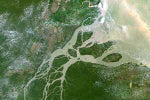

In [ ]:
path = "/content/FIRE-SMOKE-DATASET/Neutral/25422600_170x100.jpg"
PIL.Image.open(path)

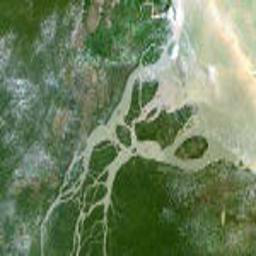

In [ ]:
path = "/content/FIRE-SMOKE-DATASET/Neutral/25422600_170x100.jpg"
fixed_width = 256
img = PIL.Image.open(path)
width_percent = (fixed_width / float(img.size[0]))
height_size = int((float(img.size[0]) * float(width_percent)))
new_image = img.resize((fixed_width, height_size))
new_image.save("/content/FIRE-SMOKE-DATASET/Neutral/25422600_170x100_new.jpg")
PIL.Image.open("/content/FIRE-SMOKE-DATASET/Neutral/25422600_170x100_new.jpg")

# Сжатие изображений до нужного размера

In [ ]:
for filepath in pathlib.Path(data_dir).rglob("*"):
  if filepath.is_dir == False:
    fixed_width = 256
    img = PIL.Image.open(filepath)
    # получаем процентное соотношение
    # старой и новой ширины
    width_percent = (fixed_width / float(img.size[0]))
    # на основе предыдущего значения
    # вычисляем новую высоту
    height_size = int((float(img.size[0]) * float(width_percent)))
    # меняем размер на полученные значения
    new_image = img.resize((fixed_width, height_size))
    new_image.show()
    new_image.save(filepath)

# Создание наборов данных (датасета)

In [ ]:
# параметры
batch_size = 32
img_height = 256
img_width = 256

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_ds.class_names

Found 3031 files belonging to 3 classes.
Using 2425 files for training.
Found 3031 files belonging to 3 classes.
Using 606 files for validation.


In [ ]:
# код для показа первых 9 картинок
#plt.figure(figsize=(10, 10))
#for images, labels in train_ds.take(1):
#  for i in range(9):
#    ax = plt.subplot(3, 3, i + 1)
#    plt.imshow(images[i].numpy().astype("uint8"))
#    plt.title(class_names[labels[i]])
#   plt.axis("off")

# Настройка производительности

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Нормализация

In [ ]:
# приводим данные к виду от 0 до 1
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

# Создание модели

In [ ]:
# увеличение данных посредством поворотов картинок и приближения
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

# ВЕКТОРИЗАЦИЯ ИЗОБРАЖЕНИЯ

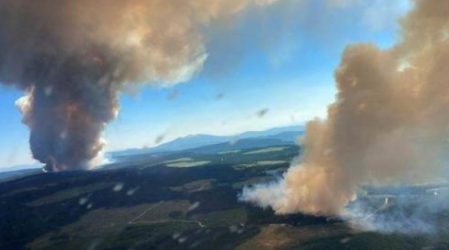

In [ ]:
path = "/content/FIRE-SMOKE-DATASET/Smoke/Cananda-wildfires.png"
PIL.Image.open(path)

In [ ]:
image = tf.keras.utils.load_img(
            path, target_size=(256, 256))
img_array = tf.keras.utils.img_to_array(image)
print(img_array)

[[[ 87.  82.  84.]
  [ 88.  82.  83.]
  [ 88.  82.  82.]
  ...
  [147. 123.  99.]
  [147. 123.  99.]
  [144. 120.  96.]]

 [[ 86.  82.  83.]
  [ 87.  81.  83.]
  [ 87.  81.  81.]
  ...
  [148. 124. 100.]
  [148. 124. 100.]
  [145. 121.  97.]]

 [[ 85.  81.  83.]
  [ 85.  81.  83.]
  [ 87.  81.  81.]
  ...
  [149. 125. 101.]
  [149. 125. 101.]
  [146. 121.  98.]]

 ...

 [[  6.  17.  35.]
  [  6.  17.  36.]
  [  4.  15.  34.]
  ...
  [ 45.  62.  71.]
  [ 45.  63.  72.]
  [ 34.  52.  61.]]

 [[  5.  16.  34.]
  [  7.  18.  36.]
  [  5.  16.  35.]
  ...
  [ 36.  54.  63.]
  [ 42.  60.  69.]
  [ 37.  55.  64.]]

 [[  4.  15.  32.]
  [  7.  18.  35.]
  [  8.  19.  37.]
  ...
  [ 34.  49.  53.]
  [ 43.  59.  63.]
  [ 37.  52.  57.]]]


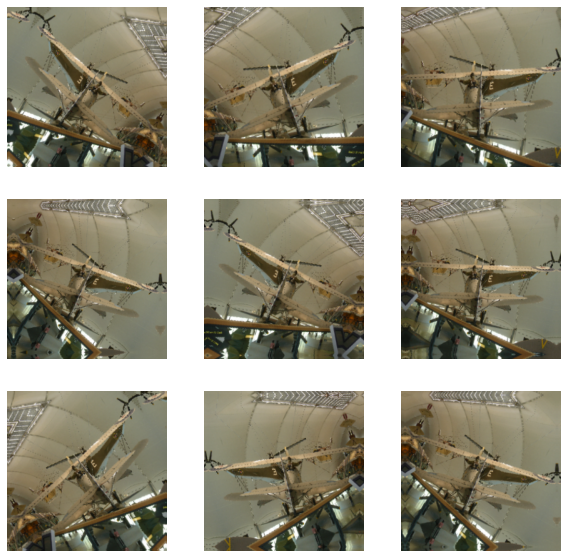

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# создание модели

In [ ]:
num_classes = len(class_names)

# модель с отсевом

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
#num_classes = len(class_names)

# обычная модель

#model = Sequential([
#  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#  layers.Conv2D(16, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
#  layers.Conv2D(32, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
# layers.Conv2D(64, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
#  layers.Flatten(),
#  layers.Dense(128, activation='relu'),
#  layers.Dense(num_classes)
#])

# Компиляция модели

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Описание модели

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 4)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                  

# Обучение модели

In [ ]:
epochs=18
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/18
76/76 [==============================] - 117s 1s/step - loss: 0.9564 - accuracy: 0.5196 - val_loss: 0.7474 - val_accuracy: 0.6650
Epoch 2/18
76/76 [==============================] - 107s 1s/step - loss: 0.7832 - accuracy: 0.6565 - val_loss: 0.7112 - val_accuracy: 0.7013
Epoch 3/18
76/76 [==============================] - 108s 1s/step - loss: 0.6812 - accuracy: 0.7204 - val_loss: 0.6349 - val_accuracy: 0.7426
Epoch 4/18
76/76 [==============================] - 109s 1s/step - loss: 0.6210 - accuracy: 0.7373 - val_loss: 0.7115 - val_accuracy: 0.7343
Epoch 5/18
76/76 [==============================] - 108s 1s/step - loss: 0.5764 - accuracy: 0.7691 - val_loss: 0.6275 - val_accuracy: 0.7624
Epoch 6/18
76/76 [==============================] - 108s 1s/step - loss: 0.5842 - accuracy: 0.7579 - val_loss: 0.5103 - val_accuracy: 0.8069
Epoch 7/18
76/76 [==============================] - 107s 1s/step - loss: 0.5357 - accuracy: 0.7810 - val_loss: 0.5081 - val_accuracy: 0.8036
Epoch 8/18
76

# Графики потерь и точности

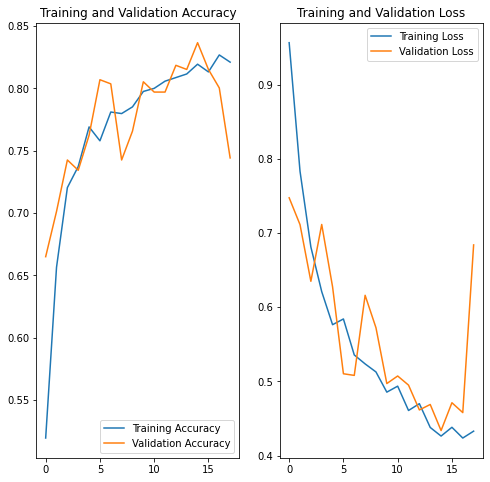

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Предсказание будущих данных

In [ ]:
#sunflower_url = "https://www.humaneuropecapital.com/media/k2/items/cache/11ff9b4c887cc2e009006cc7fd3aeb4c_M.jpg"
#sunflower_path = tf.keras.utils.get_file(origin=sunflower_url)

#img = tf.keras.utils.load_img(
#    sunflower_path, target_size=(img_height, img_width)
#)
#img_array = tf.keras.utils.img_to_array(img)
#img_array = tf.expand_dims(img_array, 0) # Create a batch

#predictions = model.predict(img_array)
#score = tf.nn.softmax(predictions[0])

#print(
#    "This image most likely belongs to {} with a {:.2f} percent confidence."
#    .format(class_names[np.argmax(score)], 100 * np.max(score))
#)

114688/99771 [==================================] - 0s 2us/step
This image most likely belongs to Smoke with a 98.30 percent confidence.


# Сохранение модели

In [ ]:
from keras.models import load_model
model.save("/content/drive/MyDrive/my_model_2_18.h5")